In [ ]:
# 1. Regras de Associação:
# 1.1. Apriori

install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
url = 'https://raw.githubusercontent.com/Prof-Rodrigo-Silva/ScriptR/master/R%20-%20Avan%C3%A7ado%20-%20Data%20Mining/GroceryStoreDataSet.csv'

In [ ]:
base2 = read.transactions(url)
summary(base2)

transactions as itemMatrix in sparse format with
 20 rows (elements/itemsets/transactions) and
 17 columns (items) and a density of 0.05882353 

most frequent items:
,,BISCUIT,CORNFLAKES,,,,,COCK,COFFEE,            ,BREAD,,,,,,,,COFFEE,SUGAR 
                                    2                                     2 
          ,BREAD,,,TEA,BOURNVITA,,,,,        ,,,,,BOURNVITA,,,,COFFEE,SUGAR 
                                    2                                     1 
      ,,,CORNFLAKES,,,,,,COFFEE,SUGAR                               (Other) 
                                    1                                    12 

element (itemset/transaction) length distribution:
sizes
 1 
20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

includes extended item information - examples:
                           labels
1  ,,,,,BOURNVITA,,,,COFFEE,SUGAR
2 ,,,CORNFLAKES,,,,,,COFFEE,SUGAR
3    ,,,CORNFLAKES,TEA,,,MAGGI,,,

In [ ]:
base3 = read.transactions(url, header = F,sep = ",",rm.duplicates = T)
summary(base3)

transactions as itemMatrix in sparse format with
 20 rows (elements/itemsets/transactions) and
 11 columns (items) and a density of 0.3 

most frequent items:
     BREAD     COFFEE    BISCUIT        TEA CORNFLAKES    (Other) 
        13          8          7          7          6         25 

element (itemset/transaction) length distribution:
sizes
 2  3  4 
 1 12  7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     3.0     3.0     3.3     4.0     4.0 

includes extended item information - examples:
     labels
1   BISCUIT
2 BOURNVITA
3     BREAD

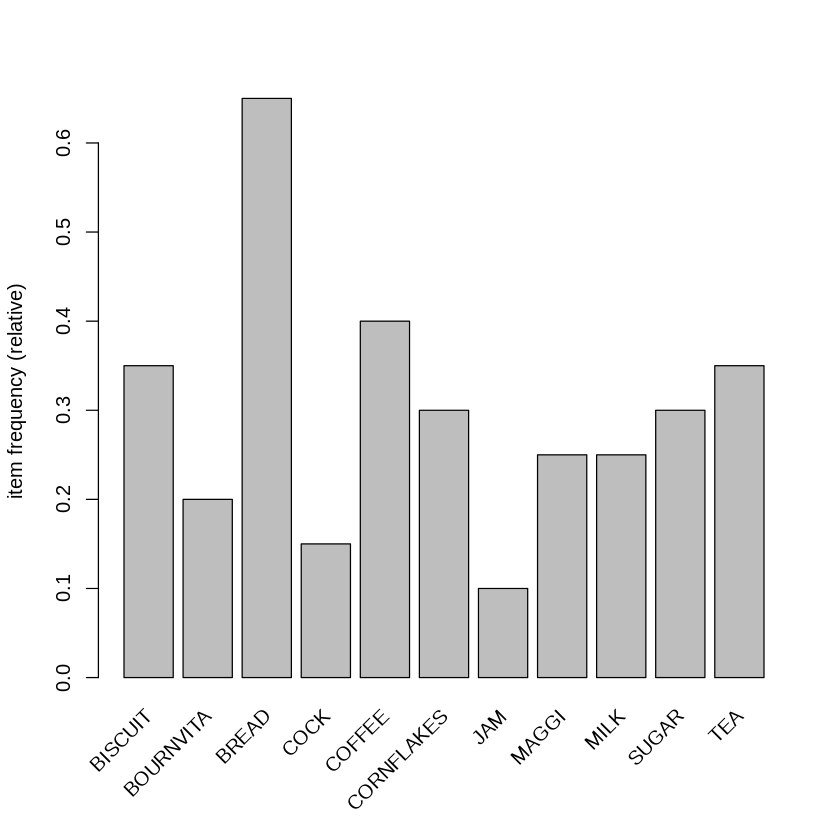

In [ ]:
itemFrequencyPlot(base3)

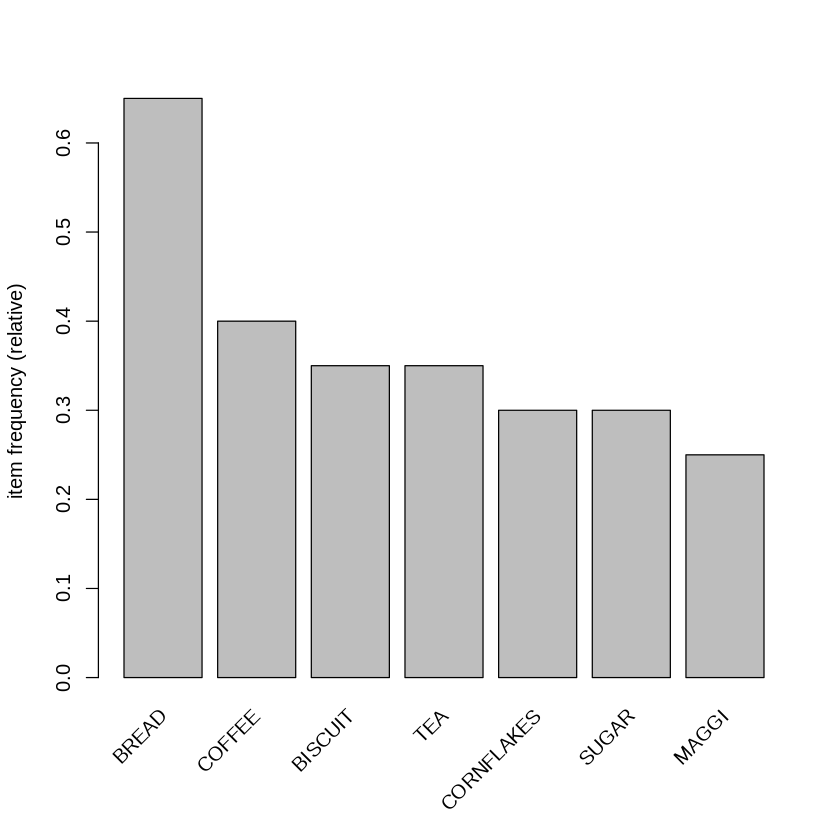

In [ ]:
itemFrequencyPlot(base3, top=7)

In [ ]:
regras = apriori(base3, parameter = list(sup = 0.1, conf = 0.5)) # do pacote arules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 20 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [55 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(regras) # loja vende água pode vender bala, cigarro. mas o foco da empresa é água (nas regras de associação vai sempre aparecer!)
# qual a água mineral é óbvio o produto sair, quem compra salgainho compra água (que se repete, o produto). Pode se eliminar os produtos, água e ...
# lojas que vendem gás e que vendem água! Produtos alimentícios em geral.. Mate etc
# O foco da empresa é água!
# eliminar a água e ver o que a empresa vende fora a água!
# utilizar o sort, pois vai dar uma ordenada

     lhs                              rhs          support confidence coverage
[1]  {}                            => {BREAD}      0.65    0.6500000  1.00    
[2]  {JAM}                         => {MAGGI}      0.10    1.0000000  0.10    
[3]  {JAM}                         => {BREAD}      0.10    1.0000000  0.10    
[4]  {COCK}                        => {CORNFLAKES} 0.10    0.6666667  0.15    
[5]  {COCK}                        => {BISCUIT}    0.10    0.6666667  0.15    
[6]  {COCK}                        => {COFFEE}     0.15    1.0000000  0.15    
[7]  {BOURNVITA}                   => {SUGAR}      0.10    0.5000000  0.20    
[8]  {BOURNVITA}                   => {TEA}        0.10    0.5000000  0.20    
[9]  {BOURNVITA}                   => {BREAD}      0.15    0.7500000  0.20    
[10] {MILK}                        => {BREAD}      0.20    0.8000000  0.25    
[11] {MAGGI}                       => {TEA}        0.20    0.8000000  0.25    
[12] {TEA}                         => {MAGGI}      0

In [ ]:
inspect(sort(regras, by="confidence")[1:30])

     lhs                              rhs          support confidence coverage
[1]  {JAM}                         => {MAGGI}      0.10    1.0000000  0.10    
[2]  {JAM}                         => {BREAD}      0.10    1.0000000  0.10    
[3]  {COCK}                        => {COFFEE}     0.15    1.0000000  0.15    
[4]  {JAM, MAGGI}                  => {BREAD}      0.10    1.0000000  0.10    
[5]  {BREAD, JAM}                  => {MAGGI}      0.10    1.0000000  0.10    
[6]  {COCK, CORNFLAKES}            => {BISCUIT}    0.10    1.0000000  0.10    
[7]  {BISCUIT, COCK}               => {CORNFLAKES} 0.10    1.0000000  0.10    
[8]  {COCK, CORNFLAKES}            => {COFFEE}     0.10    1.0000000  0.10    
[9]  {BISCUIT, COCK}               => {COFFEE}     0.10    1.0000000  0.10    
[10] {BISCUIT, COFFEE}             => {COCK}       0.10    1.0000000  0.10    
[11] {BOURNVITA, TEA}              => {BREAD}      0.10    1.0000000  0.10    
[12] {BISCUIT, MILK}               => {BREAD}      0

In [ ]:
regras1 = apriori(base3, parameter = list(sup=0.001, conf=0.5))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 0 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11 item(s), 20 transaction(s)] done [0.00s].
sorting and recoding items ... [11 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [112 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(regras1)

      lhs                              rhs          support confidence coverage
[1]   {}                            => {BREAD}      0.65    0.6500000  1.00    
[2]   {JAM}                         => {MILK}       0.05    0.5000000  0.10    
[3]   {JAM}                         => {MAGGI}      0.10    1.0000000  0.10    
[4]   {JAM}                         => {TEA}        0.05    0.5000000  0.10    
[5]   {JAM}                         => {BREAD}      0.10    1.0000000  0.10    
[6]   {COCK}                        => {CORNFLAKES} 0.10    0.6666667  0.15    
[7]   {COCK}                        => {BISCUIT}    0.10    0.6666667  0.15    
[8]   {COCK}                        => {COFFEE}     0.15    1.0000000  0.15    
[9]   {BOURNVITA}                   => {SUGAR}      0.10    0.5000000  0.20    
[10]  {BOURNVITA}                   => {TEA}        0.10    0.5000000  0.20    
[11]  {BOURNVITA}                   => {BREAD}      0.15    0.7500000  0.20    
[12]  {MILK}                        => {

In [ ]:
inspect(sort(regras1, by="confidence")[40:70])

     lhs                              rhs          support confidence coverage
[1]  {BISCUIT, COCK, CORNFLAKES}   => {COFFEE}     0.10    1.0000000  0.10    
[2]  {COCK, COFFEE, CORNFLAKES}    => {BISCUIT}    0.10    1.0000000  0.10    
[3]  {BISCUIT, COCK, COFFEE}       => {CORNFLAKES} 0.10    1.0000000  0.10    
[4]  {BISCUIT, COFFEE, CORNFLAKES} => {COCK}       0.10    1.0000000  0.10    
[5]  {CORNFLAKES, MILK, TEA}       => {COFFEE}     0.05    1.0000000  0.05    
[6]  {COFFEE, CORNFLAKES, MILK}    => {TEA}        0.05    1.0000000  0.05    
[7]  {COFFEE, MILK, TEA}           => {CORNFLAKES} 0.05    1.0000000  0.05    
[8]  {COFFEE, CORNFLAKES, TEA}     => {MILK}       0.05    1.0000000  0.05    
[9]  {BISCUIT, CORNFLAKES, MILK}   => {BREAD}      0.05    1.0000000  0.05    
[10] {BREAD, CORNFLAKES, MILK}     => {BISCUIT}    0.05    1.0000000  0.05    
[11] {BISCUIT, BREAD, CORNFLAKES}  => {MILK}       0.05    1.0000000  0.05    
[12] {BISCUIT, BREAD, MAGGI}       => {TEA}        0

In [ ]:
base = read.csv(url,header = F,sep = ",")
summary(base)

      V1                 V2                 V3                 V4           
 Length:20          Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      V5                 V6                 V7                 V8           
 Length:20          Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
      V9                V10                V11           
 Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  